20 kata paling sering muncul:
barang: 1423
tokopedia: 1400
kurir: 1135
aplikasi: 970
komplain: 894
toko: 757
lama: 688
penjual: 627
udah: 576
kali: 573
hari: 568
makin: 550
belanja: 548
ribet: 532
tapi: 521
bagus: 509
beli: 504
banyak: 487
karang: 478
padahal: 472


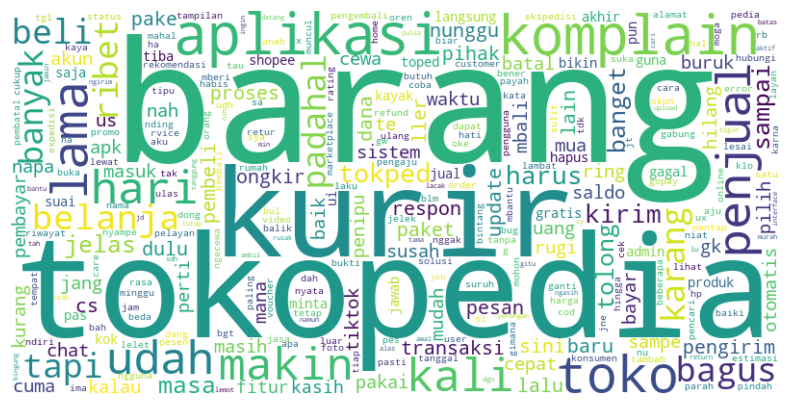

In [ ]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from collections import Counter
import re

# Step 0: Baca file CSV
df = pd.read_csv("5000_balanced_edit.csv")

# Step 1: Gabungkan semua teks
all_reviews = " ".join(df['cleaned_content'].astype(str)).lower()
all_reviews = re.sub(r'[^a-zA-Z\s]', '', all_reviews)

# Step 2: Stopwords
custom_stopwords = {
    "dan", "atau", "di", "ke", "dengan", "yang", "ini", "itu", "ada", "saya", "anda",
    "kami", "mereka", "tidak", "ga", "gak", "nya", "yg", "bisa", "mau", "juga", "sama",
    "buat", "untuk", "dari", "pada", "sebagai", "lebih", "sih", "aja", "kalo", "soal", "ok", "lagi", "ya", "sudah", "sangat","ma"
}
stopwords = set(STOPWORDS) | custom_stopwords

# Step 3: Tokenisasi dan hitung frekuensi
words = all_reviews.split()
filtered_words = [word for word in words if word not in stopwords]
word_freq = Counter(filtered_words)

# Step 4: Tampilkan 20 kata paling sering
print("20 kata paling sering muncul:")
for word, freq in word_freq.most_common(20):
    print(f"{word}: {freq}")

# Step 5: Word Cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    max_words=300,
    stopwords=stopwords,
    collocations=False
).generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
